<a href="https://colab.research.google.com/github/toot09/Python-Data_Analysis-and-Image-Processing-Tutorial/blob/master/17.%20KNN%20%EC%88%AB%EC%9E%90%20%EC%9D%B8%EC%8B%9D%20%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN숫자 인식 예제**

숫자 이미지 분류하여 저장하기

In [2]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

uploads = files.upload()

Saving digits.png to digits.png


In [20]:
img = cv2.imread('digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 세로로 50줄, 가로로 100줄로 사진을 나눕니다.
# 이 표현 좋다 for문 안에서 split
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
x = np.array(cells)
print(np.shape(x))
#print(np.shape(x[0,0]))

# 각 (20 X 20) 크기의 사진을 한 줄(1 X 400)으로 바꿉니다.
# reshape에 -1은 알아서 맞게 지정하라는 뜻
train = x[:,:].reshape(-1,400).astype(np.float32)
#print(np.shape(train))

# 0이 500개, 1이 500개, ... 로 총 5,000개가 들어가는 (1 X 5000) 배열을 만듭니다.
k = np.arange(10)
train_labels = np.repeat(k,500)[:, np.newaxis]

np.savez("trained.npz", train=train, train_labels=train_labels)
#plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#plt.show()

(50, 100, 20, 20)


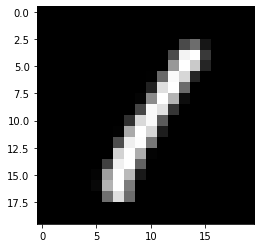

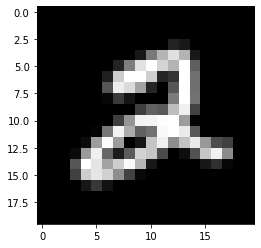

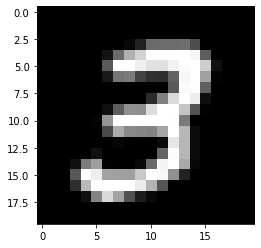

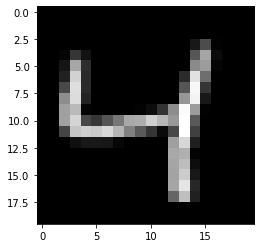

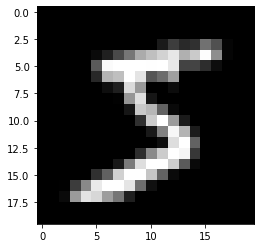

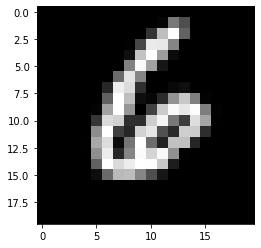

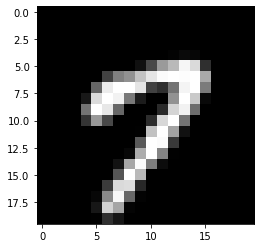

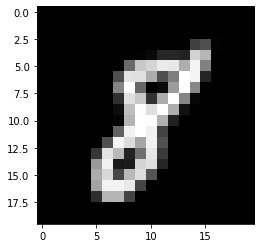

In [19]:
# 다음과 같이 하나씩 글자를 출력할 수 있습니다.
#plt.figure(1)
#plt.imshow(cv2.cvtColor(x[0,0],cv2.COLOR_BGR2RGB))
#plt.show()

# 다음과 같이 하나씩 글자를 저장할 수 있습니다.
cv2.imwrite('test_0.png',x[0,0])
cv2.imwrite('test_5.png',x[5,0])
cv2.imwrite('test_10.png',x[10,0])
cv2.imwrite('test_15.png',x[15,0])
cv2.imwrite('test_20.png',x[20,0])
cv2.imwrite('test_25.png',x[25,0])
cv2.imwrite('test_30.png',x[30,0])
cv2.imwrite('test_35.png',x[35,0])
cv2.imwrite('test_40.png',x[40,0])
img_0 = cv2.imread('test_0.png')
img_5 = cv2.imread('test_5.png')
img_10 = cv2.imread('test_10.png')
img_15 = cv2.imread('test_15.png')
img_20 = cv2.imread('test_20.png')
img_25 = cv2.imread('test_25.png')
img_30 = cv2.imread('test_30.png')
img_35 = cv2.imread('test_35.png')
img_40 = cv2.imread('test_40.png')

plt.figure(5)
plt.imshow(cv2.cvtColor(img_5,cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(10)
plt.imshow(cv2.cvtColor(img_10,cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(15)
plt.imshow(cv2.cvtColor(img_15,cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(20)
plt.imshow(cv2.cvtColor(img_20,cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(25)
plt.imshow(cv2.cvtColor(img_25,cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(30)
plt.imshow(cv2.cvtColor(img_30,cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(35)
plt.imshow(cv2.cvtColor(img_35,cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(40)
plt.imshow(cv2.cvtColor(img_40,cv2.COLOR_BGR2RGB))
plt.show()

**KNN 숫자인식**

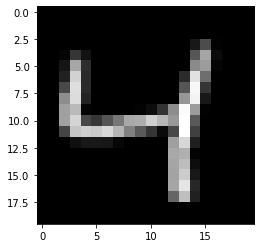

[[4.]]


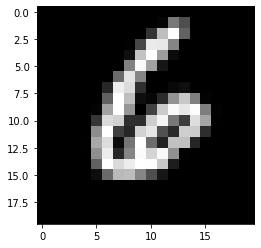

[[6.]]


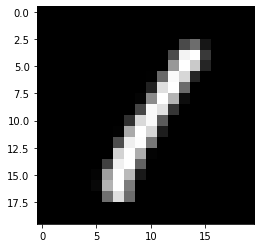

[[1.]]


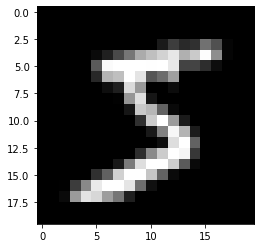

[[5.]]


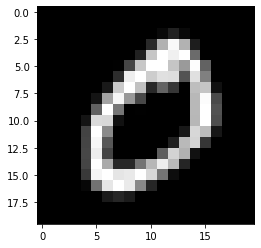

[[0.]]


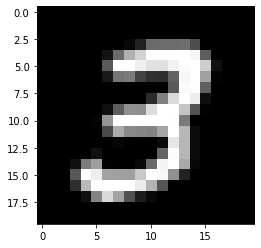

[[3.]]


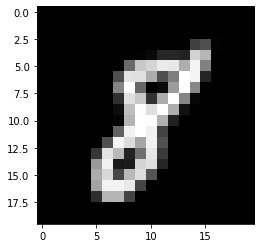

[[8.]]


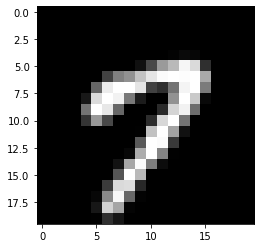

[[7.]]


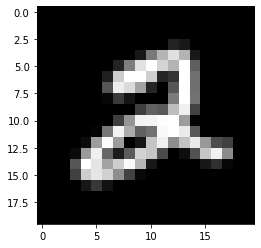

[[2.]]


In [22]:
import glob

FILE_NAME = 'trained.npz'

# 파일로부터 학습 데이터를 불러온다.
def load_train_data(file_name):
  with np.load(file_name) as data:
    train = data['train']
    train_labels = data['train_labels']
  return train, train_labels

# 손 글씨 이미지를 (20 x 20) 크기로 Scaling합니다.
def resize20(image):
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_resize = cv2.resize(gray, (20,20))
  plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
  plt.show()
  # 최종적으로는 (1 x 400) 크기로 반환합니다.
  return gray_resize.reshape(-1, 400).astype(np.float32)

def check(test, train, train_labels):
  knn = cv2.ml.KNearest_create()
  knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
  # 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾습니다.
  ret, result, neighbours, dist = knn.findNearest(test, k=5)
  return result

train, train_labels = load_train_data(FILE_NAME)

for file_name in glob.glob('./test_*.png'):
  test = resize20(file_name)
  result = check(test, train, train_labels)
  print(result)